In [114]:
import os
import pickle 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [115]:
# Create 'model' directory if it doesn't exist
if not os.path.exists('model'):
    os.makedirs('model')

In [116]:
data=pd.read_csv("Rainfall.csv")

In [117]:
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
data = data.fillna(data.mean(numeric_only=True))
print("\n\nShape: ",data.shape)

Data heads:
   day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                    50.0       16.9  
4      yes       0.0                    40.0       13.7  
Null values in the dataset before preprocessing:
day                       0
pressure                  0
maxtemp                   0
temparature         

In [118]:
print("Info:")
print(data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  366 non-null    float64
 11  windspeed               366 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB
None


In [119]:
print("Group by:")
data.groupby('rainfall').size()

Group by:


rainfall
no     117
yes    249
dtype: int64

In [120]:
data.duplicated().sum()

np.int64(0)

In [121]:
data.columns
data.rename(str.strip,
          axis='columns', 
          inplace=True)

data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [122]:
features = list(set(data.select_dtypes(include='number').columns) - {'day'})
print(features)

['sunshine', 'dewpoint', 'mintemp', 'temparature', 'winddirection', 'cloud', 'maxtemp', 'pressure', 'humidity', 'windspeed']


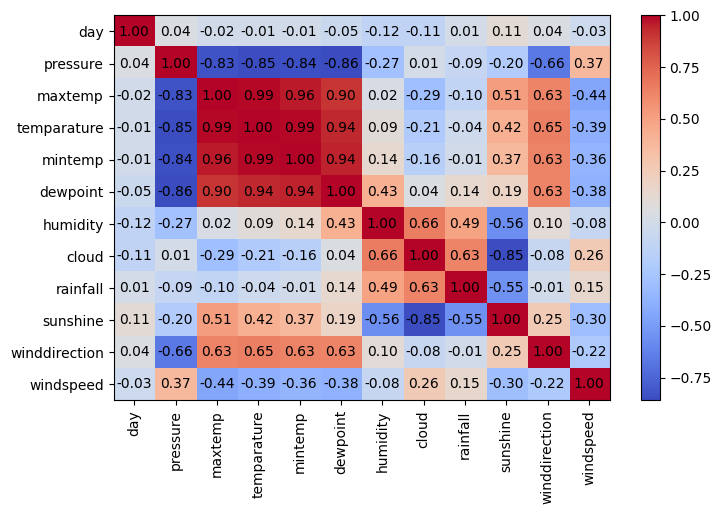

In [123]:
import matplotlib.pyplot as plt

# Replace 'yes' with 1 and 'no' with 0 in the 'rainfall' column
data['rainfall'] = data['rainfall'].map({'yes': 1, 'no': 0})

# Create the correlation matrix
corr = data.corr()

# Plot the heatmap with the actual correlation values
plt.figure(figsize=(8, 5))
plt.imshow(corr, cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)

# Annotate each cell with the numeric value of the correlation
for i in range(len(corr.columns)):
    for j in range(len(corr.index)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha="center", va="center", color="black")

plt.show()


In [124]:
data.drop(['maxtemp', 'mintemp'], axis=1, inplace=True)

In [125]:
# Select independent variables (features)
X = data[['windspeed','winddirection','cloud','pressure']]

# Select dependent variable (target)
y = data['rainfall']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [127]:
from sklearn.ensemble import RandomForestClassifier

# Convert Rainfall to Binary (Yes/No)
data['rainfall'] = data['rainfall'].map(lambda x: 'Yes' if x > 0 else 'No')

# Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
# For Classification
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 87.84%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.91      0.92      0.91        52

    accuracy                           0.88        74
   macro avg       0.86      0.85      0.85        74
weighted avg       0.88      0.88      0.88        74



In [137]:
new_data = pd.DataFrame({'windspeed': [14.3], 'winddirection': [60],'cloud': [28],'pressure': [1020.8] })  # Example input
rainfall_prediction = model.predict(new_data)
# Convert 0 to 'No' and 1 to 'Yes'
rainfall_label = {0: 'No', 1: 'Yes'}
predicted_label = rainfall_label[rainfall_prediction[0]]
print("Predicted Rainfall:",predicted_label)

Predicted Rainfall: No


In [129]:
new_data = pd.DataFrame({'windspeed': [26.3], 'winddirection': [80],'cloud': [49],'pressure': [1025.9] })  # Example input
rainfall_prediction = model.predict(new_data)
print(f"Predicted Rainfall: {rainfall_prediction}")

Predicted Rainfall: [1]


In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['rainfall'] = le.fit_transform(data['rainfall'])
print(data['rainfall'])

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64


In [131]:
# Select independent variables (features)
X = data[['windspeed','winddirection','cloud','pressure','rainfall']]

# Select dependent variable (target)
y = data['humidity']

In [132]:
# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [133]:
# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

MAE: 6.110567956113309, MSE: 65.23566033557087, R²: 0.511329330737545


In [134]:
new_data = pd.DataFrame({'windspeed': [26.3], 'winddirection': [80],'cloud': [49],'pressure': [1025.9],'rainfall':[1]})  # Example input
print("Predicted Humidity:", int(lr_model.predict(new_data)[0]))  # Combine prediction and conversion to int

Predicted Humidity: 71


In [135]:
import joblib

# Assuming lr_model and model are your trained models

# Save both models
joblib.dump(lr_model, 'lr_model.pkl')
joblib.dump(model, 'model.pkl')

# Later, to load the models
loaded_lr_model = joblib.load('lr_model.pkl')
loaded_model = joblib.load('model.pkl')

# You can now use `loaded_lr_model` and `loaded_model` to make predictions
